In [15]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tkinter as tk
from tkinter import filedialog
import pathlib


In [16]:
data = 'Train'
data = pathlib.Path(data)

In [17]:
batch_size=16
height = 64
width = 64

train_data=tf.keras.utils.image_dataset_from_directory(
    data,
    batch_size=batch_size,
    seed=123,
    validation_split=0.2,
    subset="training",
    image_size=(height,width)

)



Found 10000 files belonging to 2 classes.
Using 8000 files for training.


In [18]:
valid_data=tf.keras.utils.image_dataset_from_directory(
    data,
    batch_size=batch_size,
    seed=123,
    validation_split=0.2,
    subset="validation",
    image_size=(height,width)

)

Found 10000 files belonging to 2 classes.
Using 2000 files for validation.


In [8]:
train_label_name = train_data.class_names
print(train_label_name)

['WithMask', 'WithoutMask']


In [9]:
valid_label_name = valid_data.class_names
print(valid_label_name)

['WithMask', 'WithoutMask']


In [21]:
autotune=tf.data.experimental.AUTOTUNE
train_data=train_data.cache().shuffle(1000).prefetch(buffer_size=autotune)

valid_data=valid_data.cache().prefetch(buffer_size=autotune)

In [22]:
# CNN
num_class=2
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(height,width,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_class),
    
    
])


In [14]:
noepochs=7
model.compile(optimizer="adam",loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
mymodel=model.fit(train_data,validation_data=valid_data,epochs=noepochs)

Epoch 1/7
500/500 [==============================] - 34s 56ms/step - loss: 0.1220 - accuracy: 0.9515 - val_loss: 0.0457 - val_accuracy: 0.9855
Epoch 2/7
500/500 [==============================] - 28s 55ms/step - loss: 0.0563 - accuracy: 0.9794 - val_loss: 0.0444 - val_accuracy: 0.9850
Epoch 3/7
500/500 [==============================] - 26s 53ms/step - loss: 0.0416 - accuracy: 0.9859 - val_loss: 0.0698 - val_accuracy: 0.9780
Epoch 4/7
500/500 [==============================] - 28s 56ms/step - loss: 0.0325 - accuracy: 0.9881 - val_loss: 0.0329 - val_accuracy: 0.9885
Epoch 5/7
500/500 [==============================] - 27s 54ms/step - loss: 0.0274 - accuracy: 0.9901 - val_loss: 0.0285 - val_accuracy: 0.9915
Epoch 6/7
500/500 [==============================] - 27s 54ms/step - loss: 0.0214 - accuracy: 0.9921 - val_loss: 0.0279 - val_accuracy: 0.9925
Epoch 7/7
500/500 [==============================] - 28s 55ms/step - loss: 0.0212 - accuracy: 0.9925 - val_loss: 0.0218 - val_accuracy: 0.9935

In [22]:
epoch_range=range(noepochs)
acc=mymodel.history['accuracy']
val_acc = mymodel.history['val_accuracy']
loss=mymodel.history['loss']
val_loss=mymodel.history['val_loss']


Text(0.5, 1.0, 'Training and validation loss')

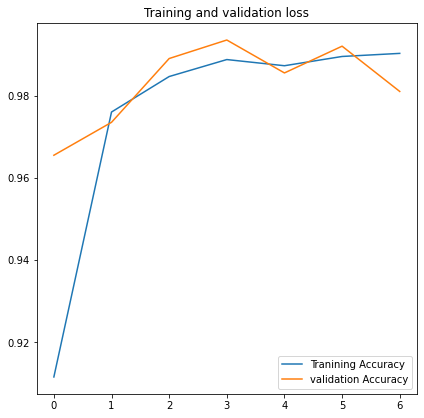

In [29]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,2)
plt.plot(epoch_range,acc,label='Tranining Accuracy')
plt.plot(epoch_range,val_acc,label='validation Accuracy')
plt.legend(loc ="lower right")
plt.title("Training and validation Accuracy")


Text(0.5, 1.0, 'Training and validation loss')

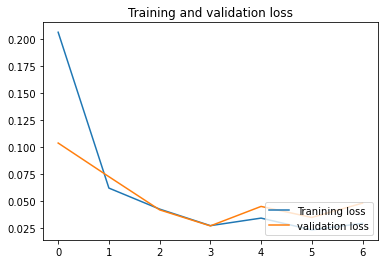

In [34]:
plt.subplot(1,1,1)
plt.plot(epoch_range,loss,label='Tranining loss')
plt.plot(epoch_range,val_loss,label='validation loss')
plt.legend(loc ="lower right")
plt.title("Training and validation loss")

In [19]:
def recogout():
    root=tk.Tk()
    root.withdraw()
    img_path=filedialog.askopenfilename()
    img=keras.preprocessing.image.load_img(img_path,target_size=(height,width))
    img_array=keras.preprocessing.image.img_to_array(img)
    img_array=tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    print("this image most likely belong to {}with a{:.2f} prcent confidence."
         .format(class_names[np.argmax(score)],100*np.max(score)))

In [ ]:
recogout()